In [6]:
import pandas as pd
import numpy as np



In [80]:
#foo = r'C:\Users\ACER\Desktop\python project\airqo/BugolobiHOULY.csv'

foo = r'C:\Users\ACER\Desktop\python project\airqo/BugolobiHOULYNUMPY2.csv'

In [83]:
df = pd.read_csv(foo)


In [84]:
df

,Date,s2_pm2_5,Date.1,hour,dayofweek,month,Date.1.1
0,2019-03-12 09:00:00,19.975000,2019-03-12 09:00:00,9,1,3,12.03.2019
1,2019-03-12 11:00:00,15.408571,2019-03-12 11:00:00,11,1,3,12.03.2019
2,2019-03-12 12:00:00,14.654348,2019-03-12 12:00:00,12,1,3,12.03.2019
3,2019-03-12 13:00:00,14.365435,2019-03-12 13:00:00,13,1,3,12.03.2019
4,2019-03-12 14:00:00,15.451739,2019-03-12 14:00:00,14,1,3,12.03.2019
...,...,...,...,...,...,...,...
174,2019-03-19 16:00:00,34.651304,2019-03-19 16:00:00,16,1,3,19.03.2019
175,2019-03-19 17:00:00,40.095778,2019-03-19 17:00:00,17,1,3,19.03.2019
176,2019-03-19 18:00:00,38.870652,2019-03-19 18:00:00,18,1,3,19.03.2019
177,2019-03-19 19:00:00,36.857609,2019-03-19 19:00:00,19,1,3,19.03.2019


In [79]:
# saving 
# saving the houry average data fro PM2.5
df.to_csv(r'C:\Users\ACER\Desktop\python project\airqo/BugolobiHOULYNUMPY2.csv',index = True)

In [77]:
df['Date'] = df.index

df['hour'] = df['Date'].dt.hour
df['dayofweek'] = df['Date'].dt.dayofweek
df['month'] = df['Date'].dt.month
df['Date'] = df['Date'].dt.strftime('%d.%m.%Y')




In [90]:
x = df['hour']
y = df['s2_pm2_5']

In [86]:
 #Using numpy to read the data
data1 = np.genfromtxt(foo,  delimiter=',', skip_header=1)
#print data1
yy = data1[:,[1]]
xx = data1[:,[3]]

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size=0.2, random_state=123)

In [88]:
from xgboost.sklearn import XGBRegressor

#Fitting XGB regressor 
xboost = XGBRegressor(n_estimators=200)

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime # to time processes
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [89]:
xboost.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [92]:
xgb_score = xboost.score(X_test, y_test)
xgb_score

-0.12116086097953649

In [93]:
#Predict 
xboost_pred = xboost.predict(X_test)

In [94]:
from math import sqrt
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, xboost_pred)))

Root mean squared error: 14.36


In [107]:
#X_ = np.linspace(xx.min(), xx.max() + 5, 50)[:, np.newaxis]
#y_pred, y_std = xboost.predict(X_, return_std=True)
#print y_pred
#print y_std 
X_ = np.linspace(x.min(), x.max() + 2, 100)[:, np.newaxis]
y_pred = xboost.predict(X_)

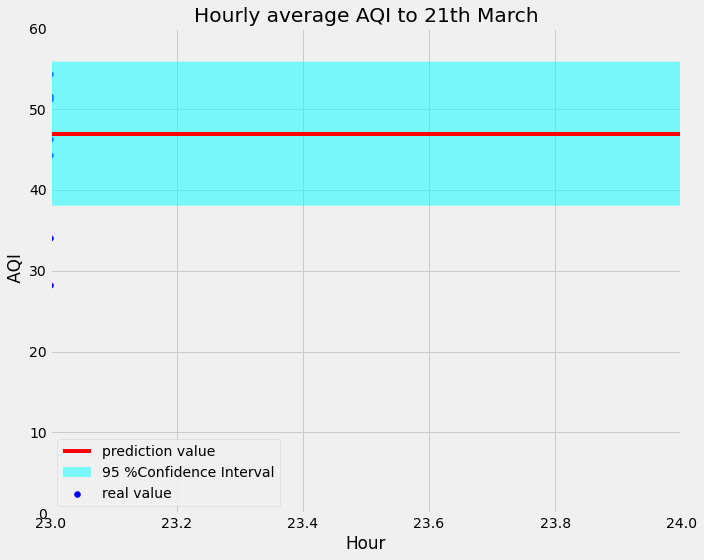

In [113]:
 # Illustration
fig, ax = plt.subplots(figsize=(10,8))

plt.scatter(xx, yy, c='b', label = 'real value')

plt.plot(X_, y_pred, 'r-', label='prediction value')

myne="95 %Confidence Interval"
sigma = np.sqrt(y_pred)
plt.fill(np.concatenate([X_, X_[::-1]]),
         np.concatenate([y_pred - 1.3 * sigma,
                        (y_pred + 1.3 * sigma)[::-1]]),
                         alpha=.5, fc='Cyan', ec='None',label=myne)


plt.xlim(23, 24)
plt.ylim(0,60)
plt.xlabel("Hour")
plt.ylabel(r" AQI")
plt.title(r"Hourly average AQI to 21th March")
plt.tight_layout()
plt.legend()
plt.show()